# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [111]:
# check whether the construction of the url is resulting in an appropriate output. 
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key
query_url = url + "&q=" + cities[0]
response = requests.get(query_url).json()
print(response["name"])

Erdemli


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Set up the lists which will be used to create dataframe
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


# Start to extracting cities' weather info
print('Beginning Data Retrieval')
print('-----------------------------')

#counters for sets
record_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    
    query_url = url + "&units=imperial&q=" + city
    response = requests.get(query_url).json()

    
    #add 1 to record counter
    #record_counter += 1
    
    # Use try and except block to prevent the code from stopping when a city cannot be found
    try:
        print(f'Processing Record {record_counter} of Set {set_counter} | {city}')
        
        # Append to lists
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
            
    # If city not found, print it out
    except(KeyError, IndexError):
        print(f"City not found. Skipping {city}...")
    
    record_counter += 1
    if record_counter == 50:
        set_counter += 1
        record_counter = 1
  
        
# Print end of data retrival...
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | erdemli
Processing Record 2 of Set 1 | turan
Processing Record 3 of Set 1 | helden
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | pontes e lacerda
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | gaoual
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | kargil
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | palabuhanratu
City not found. Skipping palabuhanratu...
Proces

Processing Record 36 of Set 4 | kargasok
Processing Record 37 of Set 4 | morondava
Processing Record 38 of Set 4 | saleaula
City not found. Skipping saleaula...
Processing Record 39 of Set 4 | barra do garcas
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping attawapiskat...
Processing Record 41 of Set 4 | praia
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | north platte
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | ternate
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | wulanhaote
City not found. Skipping wulanhaote...
Processing Record 49 of Set 4 | borovoy
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | talaya
Processing Record 3 of Set 5 | sao gabriel da cachoeira
Processing Record 4 of Set 5 | chipinge
Processing Record 5 of Set 5 | namatanai
Processing Record 6 of Set 5 | san pedro
Processing Record 7 of Set 5 | hof
P

Processing Record 27 of Set 8 | trindade
Processing Record 28 of Set 8 | chabahar
Processing Record 29 of Set 8 | macaboboni
City not found. Skipping macaboboni...
Processing Record 30 of Set 8 | kaili
Processing Record 31 of Set 8 | safranbolu
Processing Record 32 of Set 8 | paracatu
Processing Record 33 of Set 8 | vao
Processing Record 34 of Set 8 | yongan
Processing Record 35 of Set 8 | pemangkat
Processing Record 36 of Set 8 | concepcion del oro
Processing Record 37 of Set 8 | auki
Processing Record 38 of Set 8 | jibuti
Processing Record 39 of Set 8 | talisay
Processing Record 40 of Set 8 | urusha
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | warqla
City not found. Skipping warqla...
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | ust-kamchatsk
City not found. Skipping ust-kamchatsk...
Processing Record 45 of Set 8 | dalby
Processing Record 46 of Set 8 | isla mujeres
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8

Processing Record 20 of Set 12 | whithorn
Processing Record 21 of Set 12 | the valley
Processing Record 22 of Set 12 | manicore
Processing Record 23 of Set 12 | viedma
Processing Record 24 of Set 12 | bismarck
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | san cristobal
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | ojinaga
Processing Record 29 of Set 12 | isakly
Processing Record 30 of Set 12 | saint-pierre
Processing Record 31 of Set 12 | davidson
Processing Record 32 of Set 12 | maneadero
Processing Record 33 of Set 12 | ous
Processing Record 34 of Set 12 | angra
City not found. Skipping angra...
Processing Record 35 of Set 12 | eyl
Processing Record 36 of Set 12 | taksimo
Processing Record 37 of Set 12 | elizabeth city
Processing Record 38 of Set 12 | conde
Processing Record 39 of Set 12 | llanes
Processing Record 40 of Set 12 | tucuman
Processing Record 41 of Set 12 | khani
Processing Record 42 of Set 12 | khandbari
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
#create dataframe from all the appended values
city_weather_df = pd.DataFrame({
                    "City" : city_name,
                    "Lat" : lat,
                    "Lng" : lon,
                    "Max Temp" : max_temp,
                    "Humidity" : humidity,
                    "Cloudiness" : cloudiness,
                    "Wind Speed" : wind_speed,
                    "Country" : country,
                    "Date" : date
                    })

city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Erdemli,36.6050,34.3084,75.78,81,0,1.86,TR,1655755261
1,Turan,16.0678,108.2208,84.18,70,20,0.00,VN,1655754997
2,Helden,51.1150,7.9519,60.39,75,0,3.96,DE,1655755261
3,Atuona,-9.8000,-139.0333,78.12,81,8,25.79,PF,1655755008
4,Pontes e Lacerda,-15.2261,-59.3353,90.14,34,16,4.36,BR,1655755028
...,...,...,...,...,...,...,...,...,...
545,St. George's,12.0564,-61.7485,85.68,62,20,19.57,GD,1655755400
546,Boddam,57.4667,-1.7833,62.98,86,100,8.34,GB,1655755400
547,Davila,18.4726,120.5763,82.38,77,100,4.34,PH,1655755400
548,Aden,12.7794,45.0367,89.37,72,87,12.41,YE,1655755205


In [39]:
city_weather_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [40]:
city_weather_df.to_csv("output_data/cities.csv", index = False)

In [41]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.808564,13.664607,68.587855,69.660000,56.958182,7.911109,1.655755e+09
std,32.392760,89.086820,15.356867,22.427435,40.213547,5.115201,8.857862e+01
min,-54.800000,-179.166700,31.460000,6.000000,0.000000,0.000000,1.655755e+09
25%,-3.615675,-67.959175,56.977500,56.000000,14.250000,4.000000,1.655755e+09
50%,26.962100,19.637400,70.205000,75.000000,69.500000,6.910000,1.655755e+09
75%,45.496725,85.324975,79.897500,87.000000,100.000000,10.760000,1.655755e+09
max,78.218600,173.883300,102.760000,100.000000,100.000000,30.980000,1.655755e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [108]:
# inspecting data to find any city that has humidity higher than the value "100".
humid_cities = city_weather_df[(city_weather_df["Humidity"]>100)].index
humid_cities

Int64Index([], dtype='int64')

In [109]:
# the describe function also looks for the max value of humidity in the data set. 
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.808564,13.664607,68.587855,69.660000,56.958182,7.911109,1.655755e+09
std,32.392760,89.086820,15.356867,22.427435,40.213547,5.115201,8.857862e+01
min,-54.800000,-179.166700,31.460000,6.000000,0.000000,0.000000,1.655755e+09
25%,-3.615675,-67.959175,56.977500,56.000000,14.250000,4.000000,1.655755e+09
50%,26.962100,19.637400,70.205000,75.000000,69.500000,6.910000,1.655755e+09
75%,45.496725,85.324975,79.897500,87.000000,100.000000,10.760000,1.655755e+09
max,78.218600,173.883300,102.760000,100.000000,100.000000,30.980000,1.655755e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

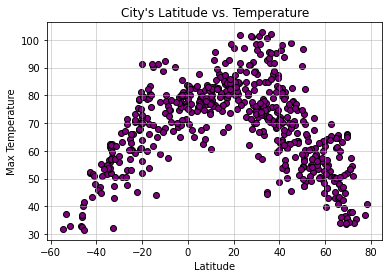

In [95]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "purple", edgecolor = "black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("City's Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output_data/images/city_lat_vs_temp.png")
plt.show()

##### PLOT: City's Latitude vs. Temperature
* This plot is looking at the max temperature at each city's latitude position.

## Latitude vs. Humidity Plot

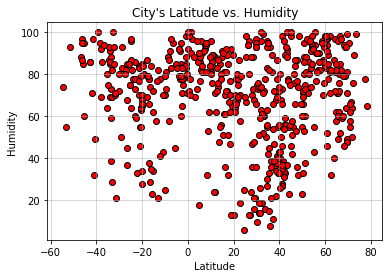

In [96]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor="red", edgecolor="black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("City's Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/images/city_lat_vs_humidity.png")
plt.show()

##### PLOT: City's Latitude vs. Humidity
* This plot is looking at the Humidity percentage at each city's latitude position. 

## Latitude vs. Cloudiness Plot

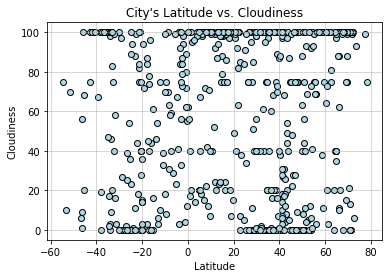

In [97]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor="lightblue", edgecolor="black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("City's Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/images/city_lat_vs_cloudiness.png")
plt.show()

##### PLOT: City's Latitude vs. Cloudiness
* This plot is looking at the Cloudiness percentage at each city's latitude position. 

## Latitude vs. Wind Speed Plot

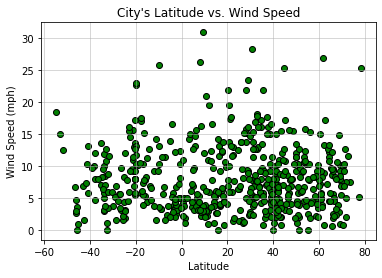

In [98]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor="green", edgecolor="black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("City's Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/images/city_lat_vs_winds.png")
plt.show()

##### PLOT: City's Latitude vs. Wind Speed
* This plot is looking at the Wind Speed (mph) at each city's latitude position. 

## Linear Regression

In [99]:
# Create DFs for Northern and Southern Hemispheres
north_h = city_weather_df.loc[city_weather_df["Lat"] > 0]
south_h = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47363334164350496


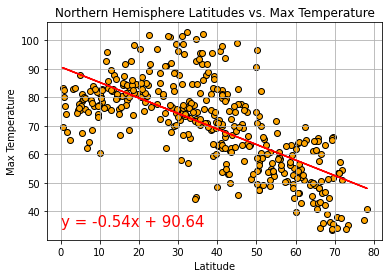

In [100]:
x_values = north_h["Lat"]
y_values = north_h["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for north hemisphere max temp
plt.scatter(x_values,y_values, facecolor="orange", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitudes vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/north_h_temp.png", mode="w")
plt.show()

##### PLOT: Northern Hemisphere Latitudes vs. Max Temperature
* This plot is showing that as the latitude is increasing, there is a drop in max temperature. This means that the farther the city is from the equator the cooler the max temperature is observed. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6315537706542026


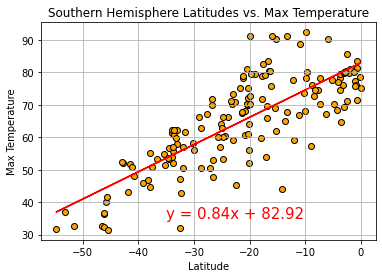

In [101]:
x_values = south_h["Lat"]
y_values = south_h["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for south hemisphere max temp
plt.scatter(x_values,y_values, facecolor="orange", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,35),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitudes vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/south_h_temp.png", mode="w")
plt.show()

##### PLOT: Southern Hemisphere Latitudes vs. Max Temperature
* This plot is showing that as the latitude is increasing, there is a increase in max temperature. This means that the closer the city gets to the equator the hotter the max temperature is observed. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0009664746389162202


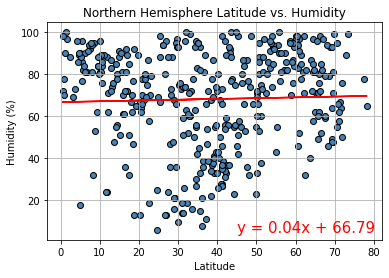

In [102]:
x_values = north_h["Lat"]
y_values = north_h["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for north hemisphere humidy
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/north_h_hum.png", mode="w")
plt.show()

##### PLOT: Northern Hemisphere Latitude vs. Humidity
* This plot is showing that as the latitude is increasing, there a very insignificant increase in humidity. This means the farther the city is from the equator there is a slight increase in humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002467283688830646


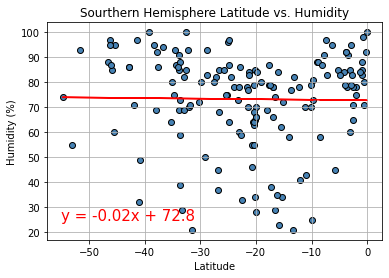

In [103]:
x_values = south_h["Lat"]
y_values = south_h["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for north hemisphere humidy
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Sourthern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/south_h_hum.png", mode="w")
plt.show()

##### PLOT: Sourthern Hemisphere Latitude vs. Humidity
* This plot is showing that as the latitude is increasing, there a very insignificant decrease in humidity. This means the closer the city gets to the equator there is a slight decrease in humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009299421063886764


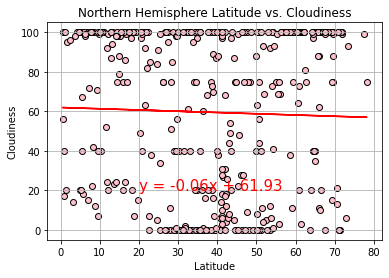

In [104]:
x_values = north_h["Lat"]
y_values = north_h["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for north hemisphere cloudiness
plt.scatter(x_values,y_values, facecolor="pink", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/north_h_cloudlat.png", mode="w")
plt.show()

##### PLOT: Northern Hemisphere Latitude vs. Cloudiness
* This plot is showing that as the latitude is increasing, there is a decrease in the percentage of cloudiness. However the decrease in cloudiness is not significant because the regression line's slope is very small. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0019108594082380428


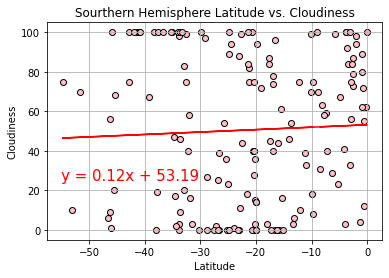

In [105]:
x_values = south_h["Lat"]
y_values = south_h["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for north hemisphere cloudiness
plt.scatter(x_values,y_values, facecolor="pink", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Sourthern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/south_h_cloudlat.png", mode="w")
plt.show()

##### PLOT: Sourthern Hemisphere Latitude vs. Cloudiness
* This plot is showing that as the latitude is increasing, there is a decrease in the percentage of cloudiness. However the decrease in cloudiness is not significant because the regression line's slope is very small. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0007955506054071918


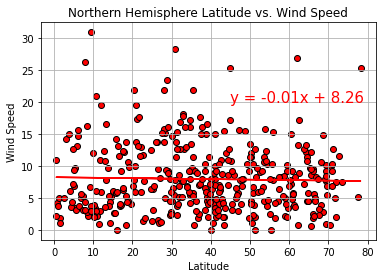

In [106]:
x_values = north_h["Lat"]
y_values = north_h["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for northern hemisphere wind speed
plt.scatter(x_values,y_values, facecolor="red", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/north_h_windlat.png", mode="w")
plt.show()

##### PLOT: Northern Hemisphere Latitude vs. Wind Speed
* This plot is showing that as the latitude is increasing, there is a decrease in the wind speed. However the decrease in wind speed is not significant because the regression line's slope is very small and closer to zero

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0019607367404575844


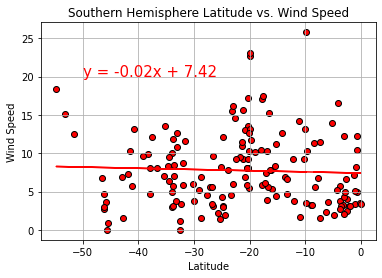

In [107]:
x_values = south_h["Lat"]
y_values = south_h["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot with regression line for southern hemisphere wind speed
plt.scatter(x_values,y_values, facecolor="red", edgecolor="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/images/south_h_windlat.png", mode="w")
plt.show()

##### PLOT: Southern Hemisphere Latitude vs. Wind Speed
* This plot is showing that as the latitude is increasing (in this case getting closer to the equator), there is a decrease in the wind speed. However the decrease in wind speed is not significant because the regression line's slope is very small and closer to zero.